### Importing essesntial libraries

In [20]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing latyers

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization

### Architecture Preparation 

In [3]:
# CNN Architecture for Information Extraction from image
model = tensorflow.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (100, 100, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening Data
# Converting into 1 Dimensional Array
model.add(Flatten())

# CNN Architecture for Model Building 
model.add(Dense(units=200,activation="relu"))
model.add(Dropout(0.25)) # to prevent overfiting
model.add(Dense(units=150,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=50,activation="relu"))
model.add(Dense(2,activation="softmax"))

### Model Compile 

In [4]:
# Model Compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [6]:
# Image Pre-Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Pre-Processing for Training and Testing
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [7]:
# Applying on Trainig Data
# Train Set
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (100, 100),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')

Found 1234 images belonging to 2 classes.


In [9]:
# Testing 
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (100, 100),
                                            batch_size = 40,
                                            class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [11]:
# Model Fitting
classifier = model.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 100,
                         validation_data = test_set,    
                         validation_steps = len(test_set))

Epoch 1/100
10/10 [==============================] - 106s 11s/step - loss: 0.5954 - accuracy: 0.6788 - val_loss: 3.0227 - val_accuracy: 0.5455
Epoch 2/100
10/10 [==============================] - 108s 11s/step - loss: 0.5537 - accuracy: 0.7002 - val_loss: 4.0777 - val_accuracy: 0.5455
Epoch 3/100
10/10 [==============================] - 105s 11s/step - loss: 0.5609 - accuracy: 0.6788 - val_loss: 1.4966 - val_accuracy: 0.5455
Epoch 4/100
10/10 [==============================] - 115s 12s/step - loss: 0.5213 - accuracy: 0.7110 - val_loss: 1.9482 - val_accuracy: 0.5455
Epoch 5/100
10/10 [==============================] - 109s 11s/step - loss: 0.4925 - accuracy: 0.7516 - val_loss: 2.8250 - val_accuracy: 0.5545
Epoch 6/100
10/10 [==============================] - 110s 11s/step - loss: 0.4860 - accuracy: 0.7441 - val_loss: 0.9437 - val_accuracy: 0.5818
Epoch 7/100
10/10 [==============================] - 111s 11s/step - loss: 0.4561 - accuracy: 0.7591 - val_loss: 1.4376 - val_accuracy: 0.5864

Epoch 58/100
10/10 [==============================] - 158s 16s/step - loss: 0.0890 - accuracy: 0.9647 - val_loss: 1.6131 - val_accuracy: 0.7273
Epoch 59/100
10/10 [==============================] - 191s 21s/step - loss: 0.0731 - accuracy: 0.9722 - val_loss: 1.9142 - val_accuracy: 0.7273
Epoch 60/100
10/10 [==============================] - 178s 19s/step - loss: 0.0676 - accuracy: 0.9807 - val_loss: 2.1102 - val_accuracy: 0.7091
Epoch 61/100
10/10 [==============================] - 173s 18s/step - loss: 0.0456 - accuracy: 0.9807 - val_loss: 2.0916 - val_accuracy: 0.7227
Epoch 62/100
10/10 [==============================] - 177s 18s/step - loss: 0.0500 - accuracy: 0.9830 - val_loss: 1.9827 - val_accuracy: 0.7500
Epoch 63/100
10/10 [==============================] - 152s 15s/step - loss: 0.0465 - accuracy: 0.9818 - val_loss: 1.9923 - val_accuracy: 0.7273
Epoch 64/100
10/10 [==============================] - 150s 15s/step - loss: 0.0522 - accuracy: 0.9818 - val_loss: 1.9885 - val_accuracy:

In [22]:
# Prediction
from tensorflow.keras.preprocessing import image

In [23]:
pre = image.load_img(r"C:\Users\Ranadheer\Downloads\skin_cancer_classification\test\benign\ISIC_0357231.jpg",target_size=(100,100))
pre = image.img_to_array(pre)
pre = np.expand_dims(pre,axis=0)
result = model.predict(pre)
print(training_set.class_indices)
print(result)

{'benign': 0, 'malignant': 1}
[[0.9927987  0.00720127]]


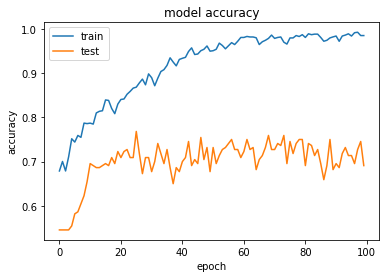

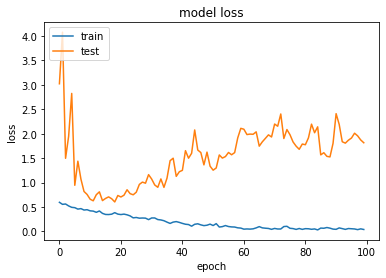

In [24]:
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Model Saving as Disk Format
model.save("dog_cat_classification.h5")